From the beginning, since the first printed newspaper, every news that makes into a page has had a specific section allotted to it. Although pretty much everything changed in newspapers from the ink to the type of paper used, this proper categorization of news was carried over by generations and even to the digital versions of the newspaper. Newspaper articles are not limited to a few topics or subjects, it covers a wide range of interests from politics to sports to movies and so on. For long, this process of sectioning was done manually by people but now technology can do it without much effort. In this hackathon, Data Science and Machine Learning enthusiasts like you will use Natural Language Processing to predict which genre or category a piece of news will fall in to from the story.

# FEATURES:

## STORY:  A part of the main content of the article to be published as a piece of news.
## SECTION: The genre/category the STORY falls in.

There are four distinct sections where each story may fall in to. The Sections are labelled as follows :

* Politics: 0
* Technology: 1
* Entertainment: 2
* Business: 3

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
train = pd.read_csv("Desktop\\TrainDataset.csv")
test = pd.read_csv("Desktop\\TestDataset.csv")
train_=train.copy()

In [5]:
train.head()

,STORY,SECTION
0,The roadshow and the filing of nomination pape...,0
1,These vulnerabilities could have allowed hacke...,1
2,"""People will now be able to include music in t...",1
3,Jersey is expected to have a good start at the...,2
4,Xiaomi’s unveiling also hints at how Samsung i...,1


In [6]:
len(train)

6102

In [7]:
train.SECTION.value_counts()

1    2224
2    1524
0    1341
3    1013
Name: SECTION, dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6102 entries, 0 to 6101
Data columns (total 2 columns):
STORY      6102 non-null object
SECTION    6102 non-null int64
dtypes: int64(1), object(1)
memory usage: 95.5+ KB


In [9]:
X=train.drop('SECTION', axis = 1)
Y=train.drop('STORY', axis = 1)
X.head()

,STORY
0,The roadshow and the filing of nomination pape...
1,These vulnerabilities could have allowed hacke...
2,"""People will now be able to include music in t..."
3,Jersey is expected to have a good start at the...
4,Xiaomi’s unveiling also hints at how Samsung i...


In [10]:
Y.head()

,SECTION
0,0
1,1
2,1
3,2
4,1


## Data Cleaning and Pre processing

### step is to create features from our data so we can train the machine learning models. The steps followed are:

cleaning of extra spaces or lines, lower casing, punctuation signs, possessive pronouns and stop words removal and lemmatization.

#### 1.Removal of extra spaces

In [11]:
for i in [train,test]:
  i['STORY'] = i['STORY'].str.replace("\n", " ")
  i['STORY'] = i['STORY'].str.replace("    ", " ")


In [12]:
train.loc[0]['STORY']

'The roadshow and the filing of nomination papers are also an attempt to show the strength of the ruling BJP in the eastern UP region, as several ministers and allies of the party are in Varanasi for the filing of nomination, expected on Friday.   BJP won 17 of the 18 Lok Sabha seats in the region in 2014, losing only Azamgarh to Samajwadi Party patriarch Mulayam Singh Yadav. It repeated the performance in the 2017 assembly polls, when it returned to power in Uttar Pradesh after a gap of 15 years.   BJP leaders said Modi visits Varanasi every few months and meets its residents. In the last five years, he had been to Varanasi at least 30 times, they said.   Finance minister Arun Jaitley tweeted that Modi’s roadshow that culminated with the customary Ganga aarti, “expresses only one indication"—that the PM “is well on the way of repeating or even increasing the 2014 victory margin".'

#### 2. Upcase/downcase




In [13]:
# Lowercasing the text

for i in [train,test]:
  i['STORY'] = i['STORY'].str.lower()

In [14]:
train.loc[0]['STORY']

'the roadshow and the filing of nomination papers are also an attempt to show the strength of the ruling bjp in the eastern up region, as several ministers and allies of the party are in varanasi for the filing of nomination, expected on friday.   bjp won 17 of the 18 lok sabha seats in the region in 2014, losing only azamgarh to samajwadi party patriarch mulayam singh yadav. it repeated the performance in the 2017 assembly polls, when it returned to power in uttar pradesh after a gap of 15 years.   bjp leaders said modi visits varanasi every few months and meets its residents. in the last five years, he had been to varanasi at least 30 times, they said.   finance minister arun jaitley tweeted that modi’s roadshow that culminated with the customary ganga aarti, “expresses only one indication"—that the pm “is well on the way of repeating or even increasing the 2014 victory margin".'

#### 3. Removal of punctuations

In [15]:

import string
for i in [train,test]:
  i['STORY']=i['STORY'].str.replace('[{}]'.format(string.punctuation), '')

In [16]:
# " when quoting text
for i in [train,test]:
  i['STORY'] = i['STORY'].str.replace('"', '')

In [17]:
train.loc[0]['STORY']

'the roadshow and the filing of nomination papers are also an attempt to show the strength of the ruling bjp in the eastern up region as several ministers and allies of the party are in varanasi for the filing of nomination expected on friday   bjp won 17 of the 18 lok sabha seats in the region in 2014 losing only azamgarh to samajwadi party patriarch mulayam singh yadav it repeated the performance in the 2017 assembly polls when it returned to power in uttar pradesh after a gap of 15 years   bjp leaders said modi visits varanasi every few months and meets its residents in the last five years he had been to varanasi at least 30 times they said   finance minister arun jaitley tweeted that modi’s roadshow that culminated with the customary ganga aarti “expresses only one indication—that the pm “is well on the way of repeating or even increasing the 2014 victory margin'

#### 4. Possessive pronouns
We'll also remove possessive pronoun terminations:



In [18]:
for i in [train,test]:
  i['STORY'] = i['STORY'].str.replace("'s", "")

In [19]:
train.loc[0]['STORY']

'the roadshow and the filing of nomination papers are also an attempt to show the strength of the ruling bjp in the eastern up region as several ministers and allies of the party are in varanasi for the filing of nomination expected on friday   bjp won 17 of the 18 lok sabha seats in the region in 2014 losing only azamgarh to samajwadi party patriarch mulayam singh yadav it repeated the performance in the 2017 assembly polls when it returned to power in uttar pradesh after a gap of 15 years   bjp leaders said modi visits varanasi every few months and meets its residents in the last five years he had been to varanasi at least 30 times they said   finance minister arun jaitley tweeted that modi’s roadshow that culminated with the customary ganga aarti “expresses only one indication—that the pm “is well on the way of repeating or even increasing the 2014 victory margin'

#### 5. Stemming and Lemmatization

Since stemming can produce output words that don't exist, we'll only use a lemmatization process at this moment. Lemmatization takes into consideration the morphological analysis of the words and returns words that do exist, so it will be more useful for us.

In [20]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:

# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [22]:
x = []

df=len(train)
for i in range(0, df):    
    x_list = []
    # Save the text and its words into an object
    text = train.loc[i]['STORY']
    words = text.split(" ")

    for j in words:
        x_list.append(wordnet_lemmatizer.lemmatize(j, pos="v"))
        
    # Join the list
    x_text = " ".join(x_list)
    
    # Append to the list containing the texts
    x.append(x_text)

In [23]:
train['STORY'] = x


In [24]:
xts = []

df=len(test)
for i in range(0, df):    
    x_list = []
    # Save the text and its words into an object
    text = test.loc[i]['STORY']
    words = text.split(" ")

    for j in words:
        x_list.append(wordnet_lemmatizer.lemmatize(j, pos="v"))
        
    # Join the list
    x_text = " ".join(x_list)
    
    # Append to the list containing the texts
    xts.append(x_text)

In [25]:
test['STORY'] = xts


In [26]:
test.loc[0]['STORY']

'privilege to have do this candid and completely non political freewheel conversation with our pm narendramodi” kumar write on the microblogging site   modi reply to the tweet say “dear akshaykumar it be good talk to you about everything except politics and elections  i’m sure people would like watch our conversation'

#### 6. Stop words

In [27]:
for i in stop_words:
    stopw = r"\b" + i + r"\b"
    train['STORY'] = train['STORY'].str.replace(stopw, '')
    stopw= r"\b" + i + r"\b"
    test['STORY'] = test['STORY'].str.replace(stopw, '')


In [28]:
train.loc[0]['STORY']

' roadshow   file  nomination paper  also  attempt  show  strength   rule bjp   eastern  region  several minister  ally   party   varanasi   file  nomination expect  friday   bjp win 17   18 lok sabha seat   region  2014 lose  azamgarh  samajwadi party patriarch mulayam singh yadav  repeat  performance   2017 assembly poll   return  power  uttar pradesh   gap  15 years   bjp leaders say modi visit varanasi every  months  meet  residents   last five years     varanasi  least 30 time  say   finance minister arun jaitley tweet  modi’ roadshow  culminate   customary ganga aarti “expresses  one indication—  pm “ well   way  repeat  even increase  2014 victory margin'

In [29]:
test.loc[0]['STORY']

'privilege     candid  completely non political freewheel conversation   pm narendramodi” kumar write   microblogging site   modi reply   tweet say “dear akshaykumar   good talk    everything except politics  elections  ’ sure people would like watch  conversation'

In [30]:
for i in [train,test]:
  i['STORY'] = i['STORY'].str.replace("  ", " ")
  i['STORY'] = i['STORY'].str.replace("   ", " ")    
  i['STORY'] = i['STORY'].str.replace("    ", " ")

In [31]:
for i in [train,test]:
  print(i.loc[0]['STORY'])

 roadshow  file nomination paper also attempt show strength  rule bjp  eastern region several minister ally  party  varanasi  file nomination expect friday  bjp win 17  18 lok sabha seat  region 2014 lose azamgarh samajwadi party patriarch mulayam singh yadav repeat performance  2017 assembly poll  return power uttar pradesh  gap 15 years  bjp leaders say modi visit varanasi every months meet residents  last five years varanasi least 30 time say  finance minister arun jaitley tweet modi’ roadshow culminate  customary ganga aarti “expresses one indication— pm “ well  way repeat even increase 2014 victory margin
privilege candid completely non political freewheel conversation  pm narendramodi” kumar write  microblogging site  modi reply  tweet say “dear akshaykumar  good talk  everything except politics elections ’ sure people would like watch conversation


In [32]:
test.head()

,STORY
0,privilege candid completely non political free...
1,6 analysts expect volatility remain high near...
2,stop marvel cinematic universe’ latest offer...
3,accord ravi menon analyst elara securities ind...
4,complaint nadiadwala know produce hit hindi f...


## EDA

In [31]:
def conver(x):
    return x.map({0:'politics',1:'technology',2:'Entertainment',3:'Business'})

train_[['SECTION']]=train_[['SECTION']].apply(conver)


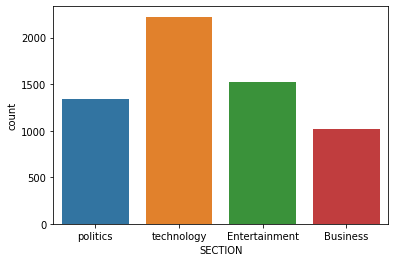

In [32]:
sns.countplot(x='SECTION',data=train_)
plt.show()

### News length by category

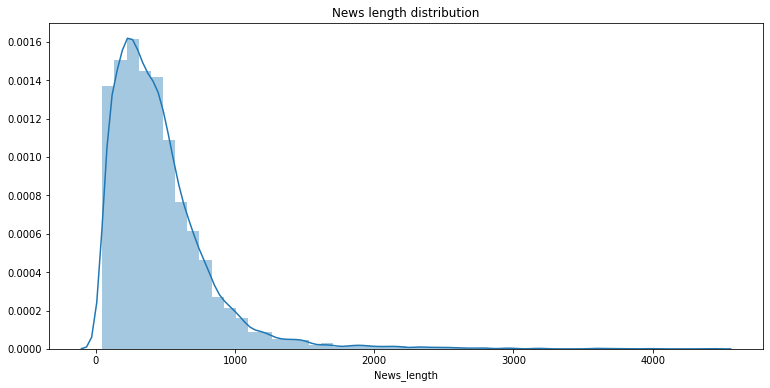

In [33]:
train_['News_length'] = train['STORY'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(train_['News_length']).set_title('News length distribution');

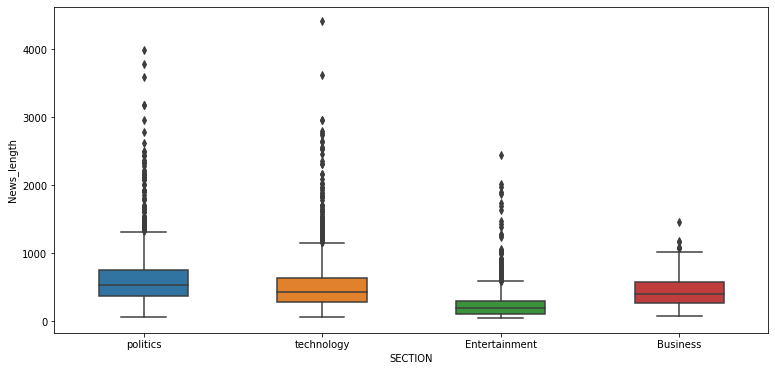

In [102]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=train_, x='SECTION', y='News_length', width=.5);

<Figure size 432x288 with 0 Axes>

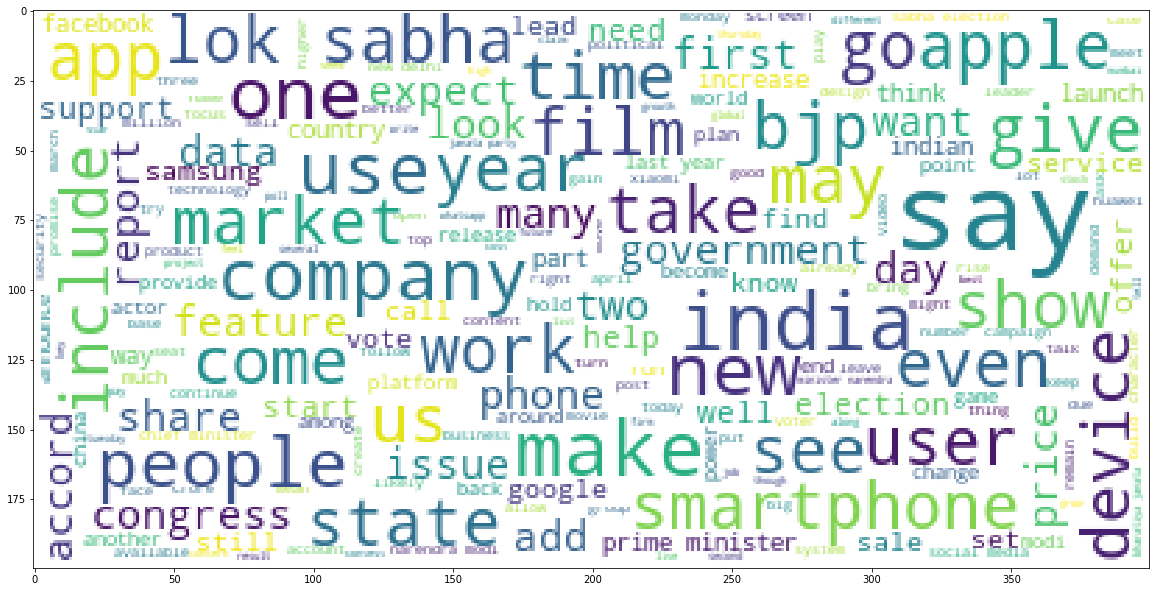

In [107]:
from wordcloud import WordCloud
text = " ".join(train['STORY'])
wordcloud = WordCloud().generate(text)
plt.figure()
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40,relative_scaling=.5).generate(text)
plt.imshow(wordcloud)
plt.show()

## Feature Creation
##### We'll use TF-IDF Vectors as features.



In [43]:
#for Train Dataset.csv

tfidf = TfidfVectorizer()
                        
features_train = tfidf.fit_transform(train['STORY']).toarray()
print(len(features_train))

#for Test Dataset.csv

features_test = tfidf.fit_transform(test['STORY']).toarray()
print(len(features_test))

6102
1526


### To transform the data and form vectors, and divide them according to the given train & test data.

In [35]:
final=x+xts

In [36]:
features=tfidf.fit_transform(final).toarray()

In [44]:
feat1=features[:len(features_train),:]
feat2=features[-len(features_test):,:]

In [45]:
len(feat2),len(feat1)

(1526, 6102)

## Train - test split


In [46]:

X_train, X_test, y_train, y_test = train_test_split(feat1,train['SECTION'],test_size=0.2, random_state=8)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4881, 33843), (1221, 33843), (4881,), (1221,))

## Model Training

### Logistic Regression

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [50]:
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)

In [51]:
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [52]:
from sklearn.metrics import *


In [53]:
y_train_pred=ovr.predict(X_train )
y_test_pred=ovr.predict(X_test)

In [54]:
g=['Train data','Test data']
print('LOGISTIC REGRESSION')

print('='*40)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_test_pred,average='macro')
print('Precision: %.2f' % precision)
recall = recall_score(y_test, y_test_pred,average='macro')
print('Recall: %.2f' % recall,)
  
f1 = f1_score(y_test, y_test_pred,average='macro')
print('F1 score: %f' % f1)
print('-'*40)





LOGISTIC REGRESSION
Accuracy: 0.963964
Precision: 0.97
Recall: 0.96
F1 score: 0.963233
----------------------------------------


### Logistic Regression ( Multinomial)

In [55]:
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(accuracy_score(y_test,pred))

0.963963963963964


### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [57]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [58]:
y_train_pred2=base_model.predict(X_train )
y_test_pred2=base_model.predict(X_test)

In [59]:
name='Random Forest'
g=['Train data','Test data']
print(name.upper())
tr=[y_train,y_test]
ts=[y_train_pred2, y_test_pred2]
print('-'*40)
for i,j,k in zip(g,tr,ts):
  print(i.upper())
  print('='*40)

  accuracy = accuracy_score(j, k)
  print('Accuracy: %f' % accuracy)
  
  precision = precision_score(j, k,average='macro')
  print('Precision: %.2f' % precision)
  
  recall = recall_score(j, k,average='macro')
  print('Recall: %.2f' % recall,)
  
  f1 = f1_score(j, k,average='macro')
  print('F1 score: %f' % f1)
  print('-'*40)



  print('\n')

RANDOM FOREST
----------------------------------------
TRAIN DATA
Accuracy: 0.995083
Precision: 1.00
Recall: 0.99
F1 score: 0.994586
----------------------------------------


TEST DATA
Accuracy: 0.882064
Precision: 0.90
Recall: 0.86
F1 score: 0.870932
----------------------------------------




## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()

In [61]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
y_train_pred3=clf.predict(X_train )
y_test_pred3=clf.predict(X_test)

In [63]:
name='Decision Tree'
g=['Train data','Test data']
print(name.upper())
tr=[y_train,y_test]
ts=[y_train_pred3, y_test_pred3]
print('-'*40)
for i,j,k in zip(g,tr,ts):
  print(i.upper())
  print('='*40)
  accuracy = accuracy_score(j, k)
  print('Accuracy: %f' % accuracy)  
  precision = precision_score(j, k,average='macro')
  print('Precision: %.2f' % precision)
  recall = recall_score(j, k,average='macro')
  print('Recall: %.2f' % recall,)
  f1 = f1_score(j, k,average='macro')
  print('F1 score: %f' % f1)
  print('-'*40)
  print('\n')

DECISION TREE
----------------------------------------
TRAIN DATA
Accuracy: 0.997541
Precision: 1.00
Recall: 1.00
F1 score: 0.997476
----------------------------------------


TEST DATA
Accuracy: 0.832924
Precision: 0.83
Recall: 0.83
F1 score: 0.828690
----------------------------------------




### Classification Report and Confusion matrix to get more idea about performance of different models

In [64]:
names=['Logistic Regression-OneVsRest Classifier','Logistic Regression-Multinominal','Random Forest','Decision Tree']
j=[y_test_pred,pred,y_test_pred2,y_test_pred3] 
for name, j in zip(names,j):
    print('='*40)
    print(name.upper()) 
    print('='*40)
    print(classification_report(y_test,j))
    print('-'*40)
    print('\n') 
    print(confusion_matrix(y_test,j))
    print('\n')

LOGISTIC REGRESSION-ONEVSREST CLASSIFIER
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       268
           1       0.97      0.98      0.97       452
           2       0.95      0.97      0.96       316
           3       0.99      0.96      0.97       185

    accuracy                           0.96      1221
   macro avg       0.97      0.96      0.96      1221
weighted avg       0.96      0.96      0.96      1221

----------------------------------------


[[250   8  10   0]
 [  2 443   5   2]
 [  8   1 307   0]
 [  0   7   1 177]]


LOGISTIC REGRESSION-MULTINOMINAL
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       268
           1       0.97      0.98      0.97       452
           2       0.95      0.97      0.96       316
           3       0.99      0.95      0.97       185

    accuracy                           0.96      1221
   macro avg       0.97      0.96      0.96

In [65]:
from sklearn.metrics import *

In [66]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('RandomForest',RandomForestClassifier(random_state = 8)))
# evaluate each model in turn
results = []
names = []
print('-------------ACCURACY SCORE-----------------')
for name, model in models:
    model.fit(X_train,y_train)
    y_pred_class = model.predict(X_test)
    acc=accuracy_score(y_test, y_pred_class)
    results.append(acc)
    names.append(name)
    print('='*40)
    print("%s: %f" %(name, acc))
print('\n')

-------------ACCURACY SCORE-----------------
LR: 0.963964
Decision Tree: 0.836200
RandomForest: 0.882064




###### This problem seems to be a classification problem as we have 4 classes, this seems to be a multi-class classification. Here in our NLP based problem which we have to select which of the class out of the 4 options, this test data should fall into. All the necessary steps to develop a service that can be used by any user in a simple way:  Getting data ,Preparing and parsing the data , Exploring the data, Creating features from data ,Training a model, Evaluating the performance of the model,Predicting for new input.
###### .
###### Looking at the data we can figure out that there would be a clear margin of separation between the points and here we have good number of training data so I chose Random Forest, since tree model Decision tree,Logistic Regression(Multiclass)  and One Vs rest Classifier ( estimator = Logistic Regression) are having a chance of overfitting. When dealing with classification problems, there are several metrics that can be used to gain insights on how the model is performing. Some of them are:  Accuracy, Precision,  Recall , F1-Score


In [67]:

ovr_y=ovr.predict(feat2)
rf_y=base_model.predict(feat2)
dt_y=clf.predict(feat2)

In [71]:
#preparing the csv file

submission1={"SECTION":ovr_y}
submission=pd.DataFrame(submission1)
submission.to_csv("NEWS_LR.csv",index=False)

In [72]:

submission2={"SECTION":rf_y}
submission=pd.DataFrame(submission2)
submission.to_csv("NEWS_RF.csv",index=False)

In [73]:


submission3={"SECTION":dt_y}
submission=pd.DataFrame(submission3)
submission.to_csv("NEWS_DT.csv",index=False)